# How good are the Baltimore Ravens?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

# use the 'seaborn-colorblind' style
plt.style.use('seaborn-colorblind')

Read in data from the Baltimore Ravens Results and Stats website and create features for plotting

In [24]:
#read in data from website
df_list = pd.read_html('http://www.baltimoreravens.com/team/history/all-time-results-and-statistics.html')
df =  pd.concat(df_list).drop(["Date","Location (Attendance)"], axis=1)
df.index = list(range(len(df)))

#create dataframe with "win/lose" and "win percentage" as columns and "Games Played Count" as index
df["Final Score"]= df["Final Score"].str.contains('W')
df["Games Played Count"]= df.index+1
df = df.set_index("Games Played Count")
df['Win/Lose'] = df['Final Score'].apply(lambda x: 1 if x == True else 0)
df.drop("Final Score",axis =1, inplace=True)
df["Win Percentage"] = [round(sum(df.head(i)['Win/Lose'])/i,2) for i in df.index]
df['Win/Lose'] = df['Win/Lose'].apply(lambda x: "Win" if x == True else "Lose")

#number of games played
print("The Baltimore Ravens have played a total of {} games.".format(df.index[-1]))

The Baltimore Ravens have played a total of 343 games.


Plot the results

<IPython.core.display.Javascript object>


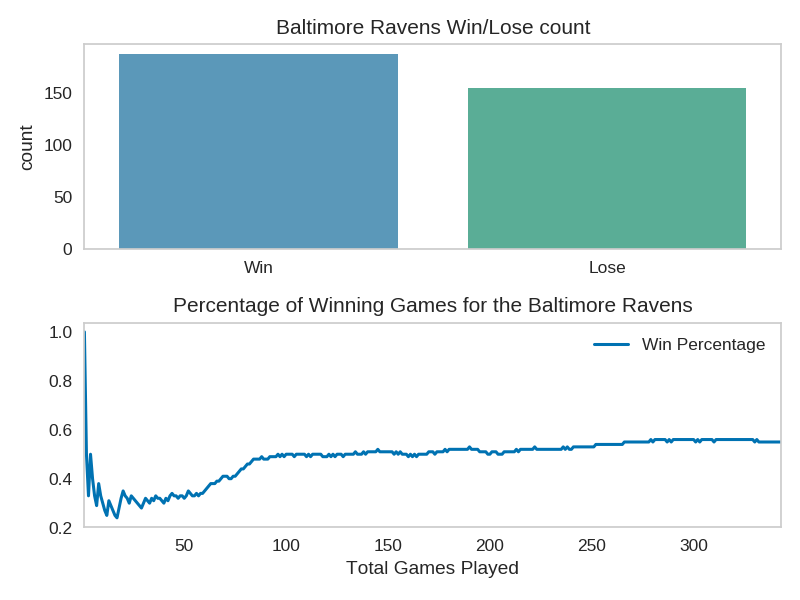

In [25]:
fig =plt.figure()
#fig.suptitle('How good are the Baltimore Ravens?', fontsize=14, fontweight='bold',y=1.01)
sns.set_style("whitegrid")

#create a Win/Lose countplot
plt.subplot(211)
sns.countplot(df['Win/Lose'], alpha=0.7,label ="aa");
plt.title("Baltimore Ravens Win/Lose count");
plt.xlabel("")
plt.grid(False)

#Plot the percentage of winning games against the number of games played
plt.subplot(212)
df.plot(ax=plt.gca())
plt.title("Percentage of Winning Games for the Baltimore Ravens");
plt.xlabel("Total Games Played")
plt.grid(False)

plt.tight_layout()


We see that the team has gotten better with time!